In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import tensorflow as tf



First step: What does this actually look like? Let's find out by evalutating this data with our great god plt.

As you can see, the data is divided into ```10``` different classes with each class representing one of an ```"airplane, automobile (but not truck or pickup truck), bird, cat, deer, dog, frog, horse, ship, and truck (but not pickup truck)"```


In [3]:
def show_images(images, labels, num_images=25):
    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            axes[i,j].set_title(f'Class: {labels[img_ctr]}')
            # axes[i]

            
            axes[i,j].imshow(images[img_ctr])
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()

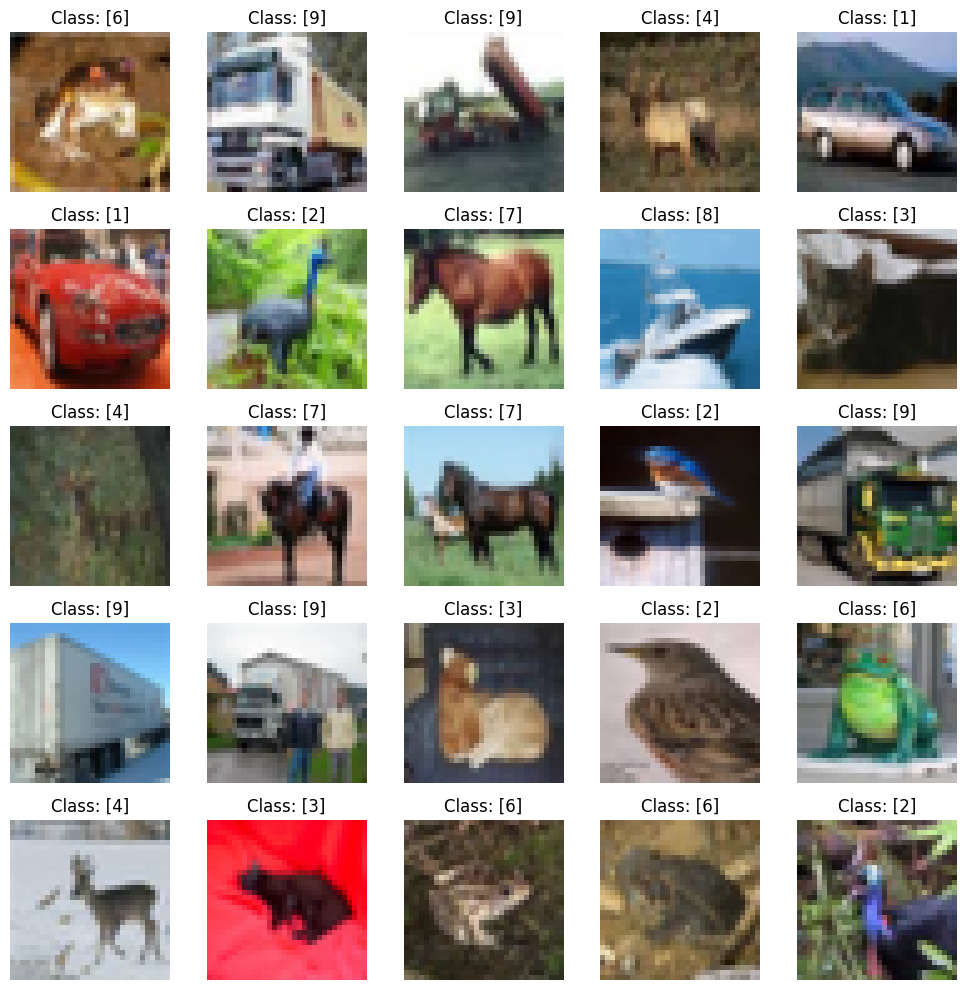

In [4]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# print(y_train.dtype)
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

show_images(x_train, y_train)

But we also might need the data to be black and white as that may help to reduce the noise that color creates in an image. To reduce aliasing then, such a system of black and white images might be used. So what do these images look like in black and white. Additionally this helps to further deal with the fact that we do not in fact, have 10000 gpus ready to run all these things. 

In [5]:
def show_images_bw(images, labels, num_images=25):

    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            axes[i,j].set_title(f'Class: {labels[img_ctr]}')
            # axes[i]

            
            axes[i,j].imshow(images[img_ctr], cmap = 'gray')
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()

In [6]:
x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

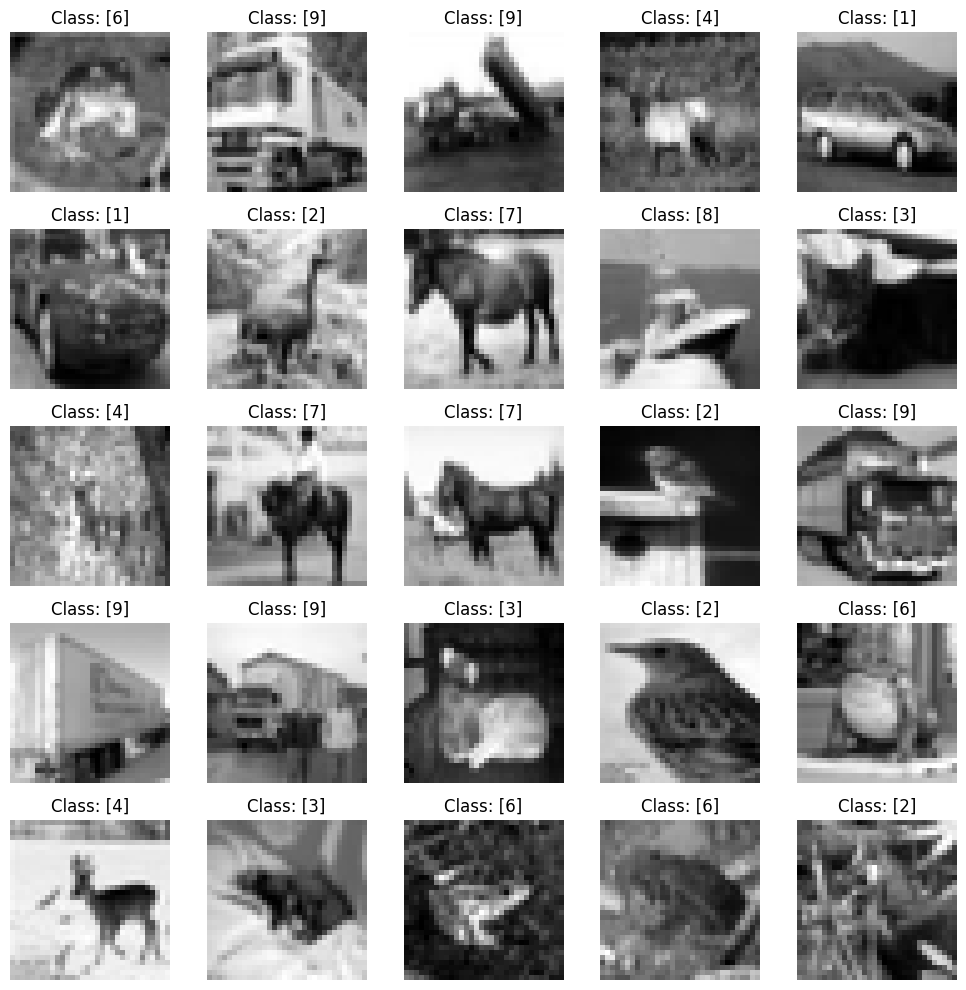

In [7]:

show_images_bw(x_train_gray, y_train)

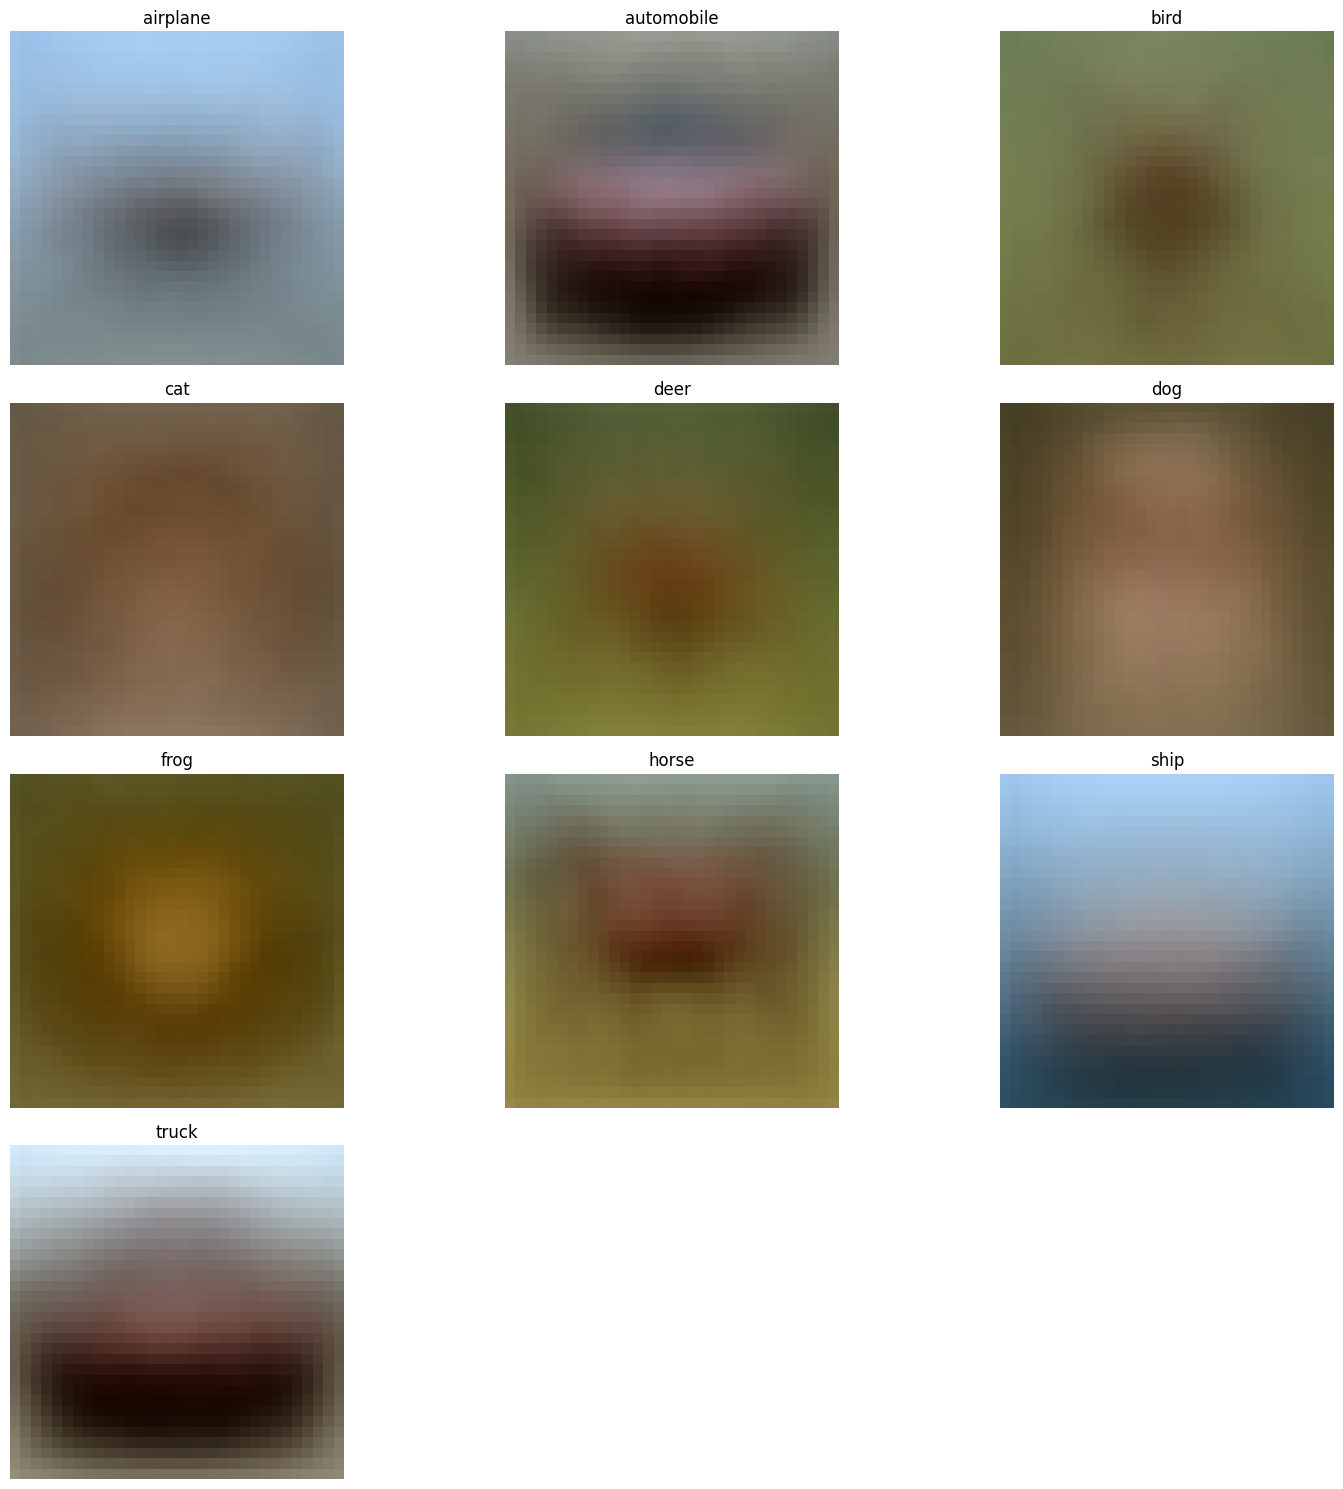

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def compute_average_images(x_data, y_data):
    """Compute the average image for each class."""
    average_images = []
    for class_index in range(10):
        class_images = x_data[y_data.flatten() == class_index]
        average_image = np.mean(class_images, axis=0)
        average_images.append(average_image)
    return average_images

def plot_average_images(average_images, class_names):
    """Plot the average images for each class."""
    plt.figure(figsize=(15, 15))
    for i, (avg_img, class_name) in enumerate(zip(average_images, class_names)):
        plt.subplot(4, 3, i + 1)
        plt.imshow(avg_img.astype('uint8'))
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

average_images = compute_average_images(x_train, y_train)

# Normalize the average images to range [0, 255]
average_images = (average_images - np.min(average_images)) / (np.max(average_images) - np.min(average_images)) * 255.0

# Plot the average images
plot_average_images(average_images, class_names)